In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
from matplotlib import pyplot

# 카드데이터와 매칭을 위한 표준 지수 계산

In [27]:
gg_vaic = pd.read_csv \
('../../data/interindustry_analysis/경기_지역별_업종별_부가가치유발계수.csv')
vaic = pd.read_excel('../../data/interindustry_analysis/부가가치유발계수_표준_업종.xlsx', \
                        sheet_name='산업연관표_표준행렬_부가가치유발계수')

In [32]:
#vaic = vaic.set_index('Unnamed: 0')
vaic

,가구,광학제품,의료기관,레저업소,레저용품,문화취미,보건위생,사무통신,서적문구,수리서비스,...,연료판매,유통업,음료식품,의류,요식업,자동차정비,자동차판매,전기가전,주방용구,직물
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
가구,0.762328,0.001341,0.001135,0.002238,0.002490,0.004172,0.002348,0.003123,0.001264,0.002145,...,0.001158,0.000585,0.003602,0.001665,0.005309,0.000286,0.001077,0.001169,2.230073e-04,0.002184
광학제품,0.017039,2.458012,0.010176,0.012660,0.083684,0.022695,0.016635,0.051561,0.028125,0.009516,...,0.012811,0.004947,0.338820,0.026378,0.021872,0.003753,0.012034,0.018959,3.937591e-03,0.018613
의료기관,0.007339,0.633221,2.164149,0.005618,0.009461,0.009986,0.006052,0.014554,0.008044,0.004967,...,0.007130,0.003019,0.053788,0.009234,0.011456,0.001863,0.003808,0.007140,1.560868e-03,0.013414
레저업소,0.003981,0.005410,0.002896,1.088370,0.004153,0.003268,0.003148,0.009065,0.005412,0.002722,...,0.004393,0.001155,0.016264,0.004569,0.003453,0.001403,0.001775,0.003864,8.346930e-04,0.008746
레저용품,0.001154,0.001548,0.002477,0.023370,1.440624,0.024143,0.001127,0.004194,0.004272,0.000898,...,0.001323,0.000987,0.005813,0.001898,0.003151,0.000365,0.000748,0.001675,5.015672e-04,0.001816
문화취미,0.002258,0.025756,0.002691,0.005499,0.054555,1.769155,0.002201,0.006264,0.022495,0.001720,...,0.002601,0.001018,0.014785,0.002863,0.003065,0.000718,0.001169,0.002450,6.113515e-04,0.004202
보건위생,0.002342,0.002632,0.014779,0.006942,0.007892,0.011332,2.296601,0.005148,0.002668,0.002681,...,0.001838,0.001294,0.008822,0.002953,0.003411,0.000521,0.000980,0.001868,4.379952e-04,0.003705
사무통신,0.021614,0.061637,0.021494,0.013908,0.029264,0.022179,0.021429,4.309701,0.030467,0.033411,...,0.031822,0.017643,0.104526,0.030267,0.030195,0.005256,0.011557,0.022383,5.704802e-03,0.041584
서적문구,0.010408,0.014589,0.023135,0.011733,0.019558,0.030740,0.015860,0.036863,1.874444,0.005853,...,0.014156,0.005459,0.051009,0.016632,0.012535,0.002420,0.005176,0.012515,3.787379e-03,0.021806


In [38]:
gg_vaic.head()
gg_vaic = gg_vaic.set_index('Unnamed: 0')

In [17]:
local_vaic_max = DataFrame(gg_vaic.max(axis = 0))
local_vaic_max.columns = ['최댓값']

In [16]:
local_vaic_min = DataFrame(gg_vaic.min(axis = 0))
local_vaic_min.columns = ['최솟값']

In [20]:
local_vaic_max_array = local_vaic_max.values
local_vaic_min_array = local_vaic_min.values

In [23]:
dt01=gg_vaic.transpose()
dt01_array=dt01.values
dt01

Unnamed: 0,가구,광학제품,의료기관,레저업소,레저용품,문화취미,보건위생,사무통신,서적문구,수리서비스,...,연료판매,유통업,음료식품,의류,요식업,자동차정비,자동차판매,전기가전,주방용구,직물
가평,0.032480,0.216908,0.174595,0.118264,0.167013,0.172711,0.121800,0.330719,0.131253,0.058565,...,0.720835,0.668973,0.875085,0.111449,0.269468,0.036643,0.025346,0.066048,0.021533,0.179466
고양,0.477720,2.726854,2.038818,1.057808,1.302839,1.631161,2.008779,3.903380,2.055248,0.817462,...,0.305903,2.662861,1.277446,0.559334,0.959873,0.197152,0.209417,0.250020,0.116125,0.451584
과천,0.091264,1.051452,1.152313,0.559319,0.432317,1.827676,0.889540,3.039326,1.482053,0.461543,...,0.294332,2.097506,1.455413,0.853172,0.819936,0.088218,0.000054,0.108515,0.084230,0.647418
광명,0.260559,2.026559,1.996657,0.701919,0.800564,1.663261,1.808022,2.592600,1.231825,0.731289,...,0.727094,3.476123,3.496002,1.111906,1.369339,0.214295,0.276213,0.545390,0.323293,1.636268
광주,0.619237,1.096465,1.013335,0.492369,0.834630,0.760155,0.751223,1.491809,0.692827,0.491585,...,1.972279,2.691027,2.441335,0.799327,1.020293,0.236618,0.143010,0.506354,0.198731,1.180178
구리,0.225778,1.695060,1.941265,0.652947,1.211943,0.898750,1.561223,2.642600,1.036684,0.580316,...,0.368282,3.392214,3.481589,1.526483,1.319279,0.237907,0.174053,0.512943,0.178240,1.400659
군포,0.093738,1.254759,2.480842,0.709132,0.915778,0.857273,1.440681,3.466164,1.870366,0.680161,...,1.238118,3.188358,2.551753,0.915107,1.256707,0.224904,0.055223,0.590754,0.175191,0.818704
남양주,0.745878,1.569338,1.747340,0.896816,1.475128,1.883166,1.593281,2.414415,1.221424,0.877483,...,0.407971,3.832159,3.745749,1.260442,1.569719,0.336822,0.179050,0.672552,0.259383,1.550049
동두천,0.163429,1.411860,1.240742,0.464204,0.853664,0.803155,1.412276,2.117338,0.883794,0.619393,...,1.417520,3.181824,2.955164,1.524227,1.320761,0.233399,0.189874,0.445416,0.229125,1.612507
부천,0.198329,2.191693,2.371151,1.010428,1.284841,1.563176,2.124364,4.491736,1.408982,0.953317,...,0.504386,4.628057,4.440913,1.550381,1.799526,0.288278,0.233912,1.127369,0.325372,1.789139


In [39]:
vaic_local_stn=DataFrame((dt01_array-local_vaic_min_array)/ \
                         (local_vaic_max_array-local_vaic_min_array))
vaic_local_stn.index=gg_vaic.columns
vaic_local_stn.columns=vaic.index
vaic_local_stn

Unnamed: 0,가구,광학제품,의료기관,레저업소,레저용품,문화취미,보건위생,사무통신,서적문구,수리서비스,...,연료판매,유통업,음료식품,의류,요식업,자동차정비,자동차판매,전기가전,주방용구,직물
가평,0.012825,0.228896,0.179323,0.113327,0.170441,0.177116,0.117470,0.362234,0.128545,0.043386,...,0.819285,0.758524,1.000000,0.105343,0.290475,0.017703,0.004467,0.052152,0.000000,0.185030
고양,0.095477,0.689346,0.507675,0.248645,0.313344,0.400035,0.499743,1.000000,0.512013,0.185184,...,0.050110,0.672449,0.306639,0.117027,0.222786,0.021395,0.024633,0.035354,0.000000,0.088576
과천,0.030011,0.345938,0.379124,0.184013,0.142226,0.601336,0.292664,1.000000,0.487617,0.151842,...,0.096825,0.690117,0.478851,0.280698,0.269763,0.029008,0.000000,0.035687,0.027696,0.213000
광명,0.014097,0.552232,0.543120,0.148589,0.178647,0.441528,0.485640,0.724716,0.310061,0.157538,...,0.156260,0.993943,1.000000,0.273519,0.351964,0.000000,0.018867,0.100891,0.033214,0.433303
광주,0.186901,0.374195,0.341569,0.137110,0.271435,0.242206,0.238701,0.529352,0.215782,0.136802,...,0.717919,1.000000,0.902005,0.257580,0.344300,0.036738,0.000000,0.142599,0.021868,0.407049
구리,0.015639,0.459861,0.534299,0.144789,0.313796,0.219105,0.419397,0.746340,0.260808,0.122829,...,0.058723,0.972978,1.000000,0.408894,0.346248,0.019306,0.000000,0.102460,0.001266,0.370852
군포,0.011292,0.351673,0.711129,0.191709,0.252293,0.235140,0.406181,1.000000,0.532153,0.183216,...,0.346794,0.918554,0.731918,0.252096,0.352244,0.049746,0.000000,0.157004,0.035172,0.223833
남양주,0.155163,0.380577,0.429303,0.196481,0.354788,0.466484,0.387131,0.611908,0.285339,0.191189,...,0.062665,1.000000,0.976346,0.296020,0.380681,0.043189,0.000000,0.135091,0.021990,0.375297
동두천,0.000000,0.413607,0.356916,0.099647,0.228676,0.211942,0.413746,0.647334,0.238658,0.151062,...,0.415483,1.000000,0.924907,0.450835,0.383426,0.023181,0.008761,0.093423,0.021765,0.480082
부천,0.000000,0.449997,0.490509,0.183329,0.245277,0.308111,0.434797,0.969226,0.273302,0.170437,...,0.069091,1.000000,0.957753,0.305222,0.361466,0.020306,0.008033,0.209728,0.028680,0.359121


# 4개지역 새 지표 

In [41]:
vaic_t4_stn02=vaic_local_stn.transpose()[['구리','광명','과천','의정부']]
vaic_t4_stn02

,구리,광명,과천,의정부
Unnamed: 0,,,,
가구,0.015639,0.014097,0.030011,0.000000
광학제품,0.459861,0.552232,0.345938,0.533399
의료기관,0.534299,0.543120,0.379124,0.502182
레저업소,0.144789,0.148589,0.184013,0.188697
레저용품,0.313796,0.178647,0.142226,0.218544
문화취미,0.219105,0.441528,0.601336,0.272230
보건위생,0.419397,0.485640,0.292664,0.429435
사무통신,0.746340,0.724716,1.000000,1.000000
서적문구,0.260808,0.310061,0.487617,0.286425


Text(0.5, 1.0, '경기 지역별 업종별 계수 표준화 카드데이터 매칭용')

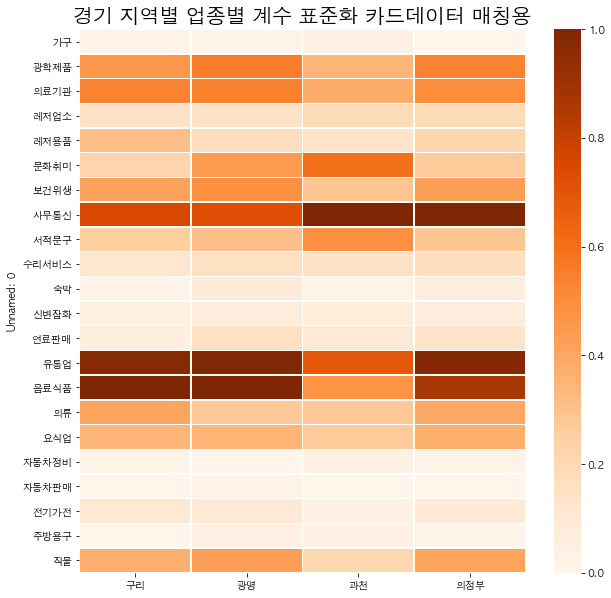

In [44]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(data=vaic_t4_stn02, annot=False, fmt='.2f', \
            linewidths=.5, cmap='Oranges')
plt.title('경기 지역별 업종별 계수 표준화 카드데이터 매칭용', fontsize=20)

In [45]:
#vaic_t4_stn02.to_csv \
#('../../data/interindustry_analysis/경기_지역별_업종별_부가가치유발계수_표준화_4개지역_카드데이터매칭용.csv')